# Research assignment 3

Ashley Borjon

Impact of race on medicalization or criminalization of ADHD

February 24, 2024

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe ow your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
My dependent variable is days_missed. This variable is a continuous variable. I recoded the variable from NSCH represeneting the the number of days of school missed by the child from categorical to continuous using midpoint formula on the date categories. The unit of measurement is days. 
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
The independent variables that I am most interested in are the follwoing: Is the child taking medication for ADHD (adhd_meds), Number of times the school has contacted household adults regarding problems related to ADHD (school_contact) and, race of the child (child_race). All variables are nominal. I am interested in examing if the child is taking medication for ADHD as research shows it has differing effects on education outcomes. For this project, I am focused on students with ADHD.

    C. What are your control variables? Are they interval ratio or nominal? Why?
My Control variables are race and the number of times the school has contacted the family regarding behavioral issues. I include race as a possible interactive variable as it may have effects on the cultural ideals a family has towards education and the importance of attendance and how frequently the school contacts the family. The number of times that the school has  contacted the family may have a spurious relationship.

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
H1: I hypothesize that children taking medication for ADHD will have higher missed days of school.  

H2: I hypothesize that children taking medication for ADHD will have higer missed days of school, controlling for race and the number of times the school has contacted the family. 

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
cd "/Users/aborjon/Desktop/stats2/soc211"

/Users/aborjon/Desktop/stats2/soc211


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Research Assignment 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/aborjon/Desktop/stats2/soc211/Research Assignment 3.log
  log type:  text
 opened on:  26 Feb 2024, 21:11:53


In [4]:
use sc_race_r ace11 sc_age_years sc_racer k2q31a k2q31d k7q04r_r addtreat k2q31b k7q02r_r using "/Users/aborjon/Desktop/stats2/soc211/ProblemSet3/nsch_2022_topical_Stata/nsch_2022e_topical.dta", clear

In [5]:
tab sc_race_r
describe sc_race_r


  SC_RACE_R |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |     41,337       76.40       76.40
          2 |      3,710        6.86       83.26
          3 |        532        0.98       84.24
          4 |      3,450        6.38       90.62
          5 |        347        0.64       91.26
          7 |      4,727        8.74      100.00
------------+-----------------------------------
      Total |     54,103      100.00

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
sc_race_r       byte    %8.0g                 SC_RACE_R


In [6]:
describe ace11 sc_age_years sc_racer k2q31a k2q31d k7q04r_r sc_race_r addtreat k2q31b k7q02r_r


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
ace11           byte    %10.0g                ACE11
sc_age_years    byte    %8.0g                 SC_AGE_YEARS
sc_racer        byte    %8.0g                 SC_RACER
k2q31a          byte    %10.0g                K2Q31A
k2q31d          byte    %10.0g                K2Q31D
k7q04r_r        byte    %10.0g                K7Q04R_R
sc_race_r       byte    %8.0g                 SC_RACE_R
addtreat        byte    %10.0g                ADDTREAT
k2q31b          byte    %10.0g                K2Q31B
k7q02r_r        byte    %10.0g                K7Q02R_R


In [7]:
qui label var sc_race_r"Child's Race" 
qui label var ace11"Mistr. for Diagnosis"
qui label var sc_age_years"Child's Age"
qui label var k2q31d"Taking ADHD Meds"
qui label var k7q04r_r"Times School Contacted w/ Probs"
qui label var k2q31a"Diagnosed w/ ADHD"
qui label var addtreat"Behavioral Treatment"
qui label var k2q31b"Currently have ADHD/ADD"
qui label var k7q02r_r"Days Child Missed School"

In [8]:
gen school_contact=k7q04r_r

label var school_contact "Times School Contacted"
label define school_contact 1"None" 2"1 time" 3"2 or more times" 
label values school_contact school_contact

(20,227 missing values generated)


In [9]:
replace school_contact=. if k7q04r_r==(.m)
replace school_contact=. if k7q04r_r==(.n)

codebook school_contact

(486 real changes made, 486 to missing)
(19,741 real changes made, 19,741 to missing)

-------------------------------------------------------------------------------
school_contact                                           Times School Contacted
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: school_contact

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 20,227/54,103

            Tabulation: Freq.   Numeric  Label
                       25,908         1  None
                        3,642         2  1 time
                        4,326         3  2 or more times
                       20,227         .  


In [10]:
gen child_race=sc_race_r

label var child_race "Race of Child"
label define child_race 1"White" 2"Black/AA" 3"A. Indian/Alaska Nat." 4"Asian" 5"Hawaiian/Pac. Islander" 7"2 or more races"
label values child_race child_race

codebook child_race


-------------------------------------------------------------------------------
child_race                                                        Race of Child
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: child_race

                 Range: [1,7]                         Units: 1
         Unique values: 6                         Missing .: 0/54,103

            Tabulation: Freq.   Numeric  Label
                       41,337         1  White
                        3,710         2  Black/AA
                          532         3  A. Indian/Alaska Nat.
                        3,450         4  Asian
                          347         5  Hawaiian/Pac. Islander
                        4,727         7  2 or more races


In [11]:
gen child_adhd=k2q31b

label var child_adhd "Currently have ADD/ADHD"
label define child_adhd 1"Yes" 2"No" 
label values child_adhd child_adhd


(48,652 missing values generated)


In [12]:
replace child_adhd=. if k2q31b==(.m)
replace child_adhd=. if k2q31b==(.l)

codebook child_adhd

(432 real changes made, 432 to missing)
(48,220 real changes made, 48,220 to missing)

-------------------------------------------------------------------------------
child_adhd                                              Currently have ADD/ADHD
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: child_adhd

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 48,652/54,103

            Tabulation: Freq.   Numeric  Label
                        5,119         1  Yes
                          332         2  No
                       48,652         .  


In [13]:
tab school_contact child_adhd


                |    Currently have
   Times School |       ADD/ADHD
      Contacted |       Yes         No |     Total
----------------+----------------------+----------
           None |     2,316        198 |     2,514 
         1 time |       731         55 |       786 
2 or more times |     1,760         65 |     1,825 
----------------+----------------------+----------
          Total |     4,807        318 |     5,125 


In [14]:
gen adhd_meds=k2q31d

label var adhd_meds "Currently taking ADHD Meds"
label define adhd_meds 1"yes" 2"no" 
label values adhd_meds adhd_meds
replace adhd_meds=. if k2q31d==(.m)
replace adhd_meds=. if k2q31d==(.l) 

codebook adhd_meds

(48,546 missing values generated)
(326 real changes made, 326 to missing)
(48,220 real changes made, 48,220 to missing)

-------------------------------------------------------------------------------
adhd_meds                                            Currently taking ADHD Meds
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: adhd_meds

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 48,546/54,103

            Tabulation: Freq.   Numeric  Label
                        2,936         1  yes
                        2,621         2  no
                       48,546         .  


In [15]:
tab school_contact adhd_meds


                | Currently taking ADHD
   Times School |         Meds
      Contacted |       yes         no |     Total
----------------+----------------------+----------
           None |     1,355      1,227 |     2,582 
         1 time |       440        354 |       794 
2 or more times |     1,052        778 |     1,830 
----------------+----------------------+----------
          Total |     2,847      2,359 |     5,206 


In [16]:
gen missed_days=k7q02r_r

label var missed_days "Days Child Missed School"
label define missed_days 1"No Missed Days" 2"1-3 Days" 3"4-6 Days" 4"7-10 Days" 5"11 or More Days" 6"Child not Enrolled"
label values missed_days missed_days

codebook missed_days

(20,188 missing values generated)

-------------------------------------------------------------------------------
missed_days                                            Days Child Missed School
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: missed_days

                 Range: [1,6]                         Units: 1
         Unique values: 6                         Missing .: 0/54,103
       Unique mv codes: 2                        Missing .*: 20,188/54,103

            Tabulation: Freq.   Numeric  Label
                        8,583         1  No Missed Days
                       12,166         2  1-3 Days
                        6,453         3  4-6 Days
                        3,736         4  7-10 Days
                        2,768         5  11 or More Days
                          209         6  Child not Enrolled
                          447        .m  
                       19

In [17]:
gen days_missed=.
replace days_missed=0 if missed_days==1
replace days_missed=2 if missed_days==2
replace days_missed=5 if missed_days==3
replace days_missed=8.5 if missed_days==4
replace days_missed=11 if missed_days==5

(54,103 missing values generated)
(8,583 real changes made)
(12,166 real changes made)
(6,453 real changes made)
(3,736 real changes made)
(2,768 real changes made)


In [18]:
tab days_missed


days_missed |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      8,583       25.46       25.46
          2 |     12,166       36.09       61.56
          5 |      6,453       19.14       80.70
        8.5 |      3,736       11.08       91.79
         11 |      2,768        8.21      100.00
------------+-----------------------------------
      Total |     33,706      100.00


In [19]:
tab child_adhd


  Currently |
       have |
   ADD/ADHD |      Freq.     Percent        Cum.
------------+-----------------------------------
        Yes |      5,119       93.91       93.91
         No |        332        6.09      100.00
------------+-----------------------------------
      Total |      5,451      100.00


In [20]:
*keeping only respondents who have ADHD so that I can look at who is taking meds and who isn't 
keep if child_adhd==1

(48,984 observations deleted)


In [21]:
tab child_adhd


  Currently |
       have |
   ADD/ADHD |      Freq.     Percent        Cum.
------------+-----------------------------------
        Yes |      5,119      100.00      100.00
------------+-----------------------------------
      Total |      5,119      100.00


In [22]:
tab sc_age_years


Child's Age |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |          1        0.02        0.02
          2 |         14        0.27        0.29
          3 |         43        0.84        1.13
          4 |         62        1.21        2.34
          5 |        152        2.97        5.31
          6 |        196        3.83        9.14
          7 |        245        4.79       13.93
          8 |        311        6.08       20.00
          9 |        370        7.23       27.23
         10 |        424        8.28       35.51
         11 |        400        7.81       43.33
         12 |        400        7.81       51.14
         13 |        447        8.73       59.87
         14 |        461        9.01       68.88
         15 |        530       10.35       79.23
         16 |        501        9.79       89.02
         17 |        562       10.98      100.00
------------+-----------------------------------
      Total |      

In [23]:
tab sc_age_years days_missed


   Child's |                      days_missed
       Age |         0          2          5        8.5         11 |     Total
-----------+-------------------------------------------------------+----------
         6 |        43         50         40         31         28 |       192 
         7 |        42         82         56         34         29 |       243 
         8 |        68        106         62         39         33 |       308 
         9 |        91        113         80         51         30 |       365 
        10 |        91        135         79         59         57 |       421 
        11 |        89        121         74         61         46 |       391 
        12 |        83        134         84         52         40 |       393 
        13 |       111        143         74         48         69 |       445 
        14 |       108        134         94         58         66 |       460 
        15 |       102        150        110         70         90 |       

In [24]:
describe ace11 sc_age_years child_race days_missed k2q31a k2q31d k7q04r_r child_adhd adhd_meds school_contact


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
ace11           byte    %10.0g                Mistr. for Diagnosis
sc_age_years    byte    %8.0g                 Child's Age
child_race      float   %22.0g     child_race
                                              Race of Child
days_missed     float   %9.0g                 
k2q31a          byte    %10.0g                Diagnosed w/ ADHD
k2q31d          byte    %10.0g                Taking ADHD Meds
k7q04r_r        byte    %10.0g                Times School Contacted w/ Probs
child_adhd      float   %9.0g      child_adhd
                                              Currently have ADD/ADHD
adhd_meds       float   %9.0g      adhd_meds
                                              Currently taking ADHD Meds
school_contact  float   %15.0g     school_contact
                                              Time

In [25]:
codebook ace11 sc_age_years child_race days_missed k2q31a k2q31d k7q04r_r child_adhd adhd_meds school_contact


-------------------------------------------------------------------------------
ace11                                                      Mistr. for Diagnosis
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 0/5,119
       Unique mv codes: 1                        Missing .*: 165/5,119

            Tabulation: Freq.  Value
                          736  1
                        4,218  2
                          165  .m

-------------------------------------------------------------------------------
sc_age_years                                                        Child's Age
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [0,17]                        Units: 1
         Unique values: 17      

In [26]:
tab child_race school_contact


                      |      Times School Contacted
        Race of Child |      None     1 time  2 or more |     Total
----------------------+---------------------------------+----------
                White |     1,926        602      1,363 |     3,891 
             Black/AA |       142         51        139 |       332 
A. Indian/Alaska Nat. |        24          3         20 |        47 
                Asian |        50         14         37 |       101 
Hawaiian/Pac. Islande |         6          2          7 |        15 
      2 or more races |       168         59        194 |       421 
----------------------+---------------------------------+----------
                Total |     2,316        731      1,760 |     4,807 


## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show
The scatterplots represent the bivariate relationship between the number of missed days from school and each independent variable. There fitted line for race appears to be flat, indicating there to be no relationship between the race of the child and the number of days missed from school. There is a positive relationship between the number of times the school has contacted family and the number of missed days of school. There appears to be a moderately positive relationship between children who are taking ADHD medication and the number of fdays missed from school. 

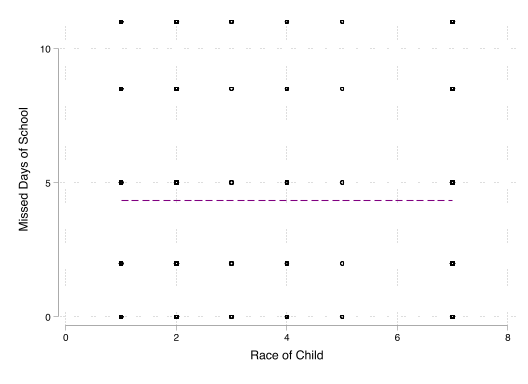

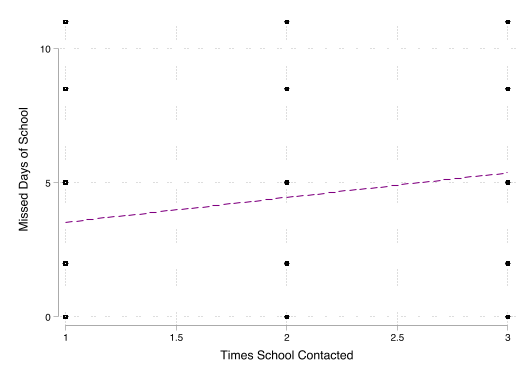

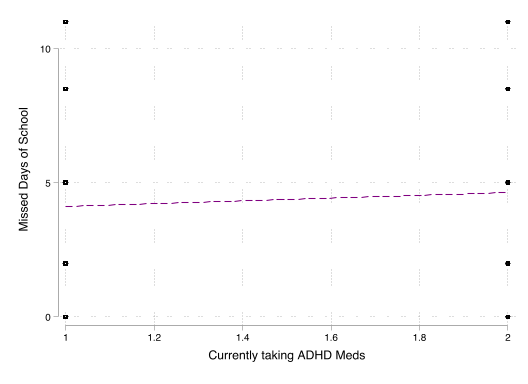

In [27]:
foreach x in child_race school_contact adhd_meds {
quietly  graph twoway (scatter days_missed `x') (lfit days_missed `x', color(purple)), ///
    name(`x', replace) legend(off) ytitle(Missed Days of School) scheme(plotplainblind)
}

In [28]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [29]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


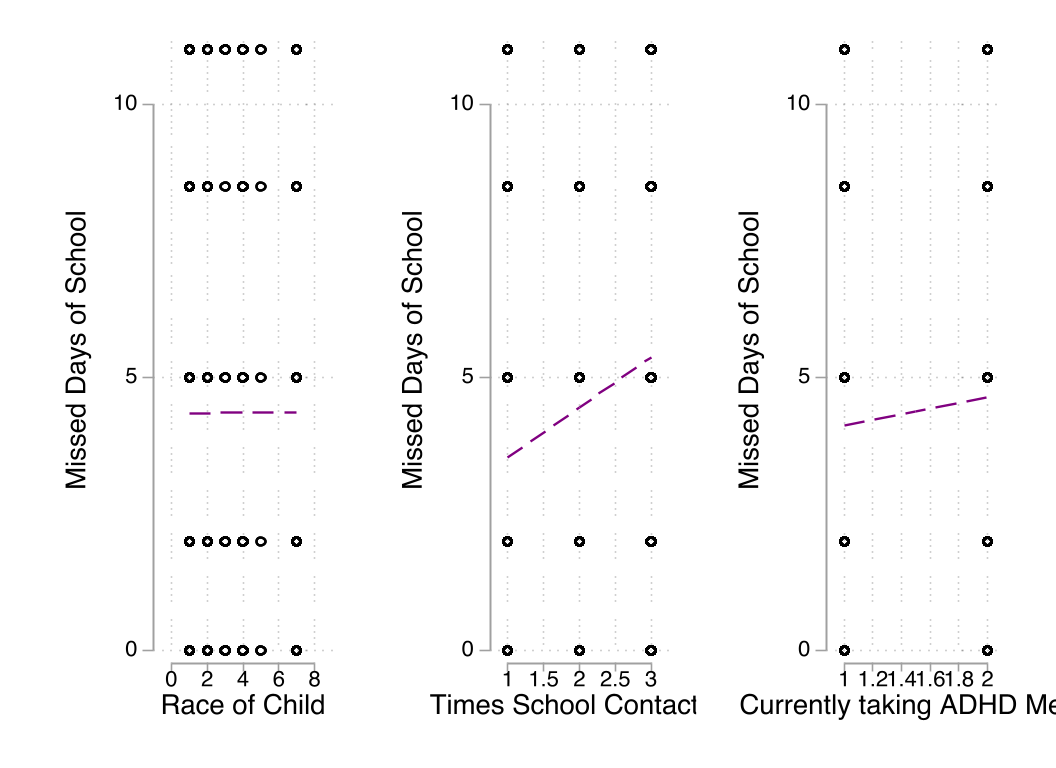

In [30]:
graph combine child_race school_contact adhd_meds, col(3) scheme(plotplainblind) xsize(4)

the below code is just out of curiousity and not included in my responses

In [32]:
codebook school_contact


-------------------------------------------------------------------------------
school_contact                                           Times School Contacted
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: school_contact

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 312/5,119

            Tabulation: Freq.   Numeric  Label
                        2,316         1  None
                          731         2  1 time
                        1,760         3  2 or more times
                          312         .  


In [33]:
gen contact=.
replace contact=0 if school_contact==1
replace contact=1 if school_contact==2
replace contact=2 if school_contact==3

(5,119 missing values generated)
(2,316 real changes made)
(731 real changes made)
(1,760 real changes made)


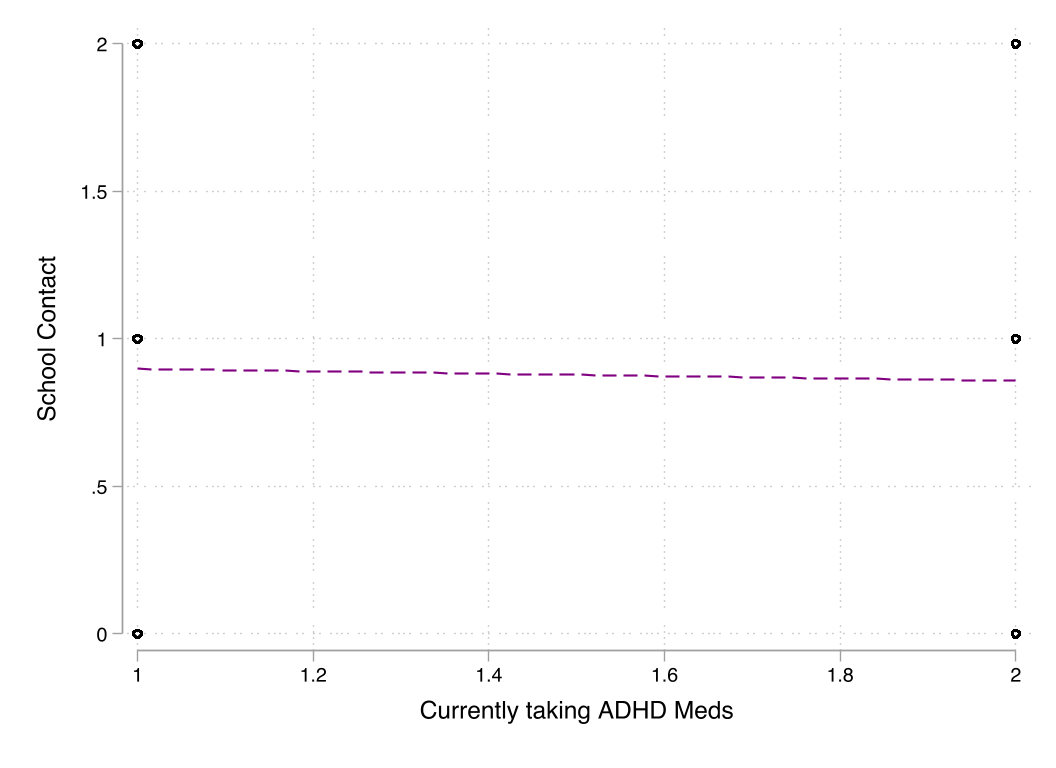

In [37]:
foreach x in adhd_meds {
quietly  graph twoway (scatter contact `x') (lfit contact `x', color(purple)), ///
    name(`x', replace) legend(off) ytitle(School Contact) scheme(plotplainblind)
}

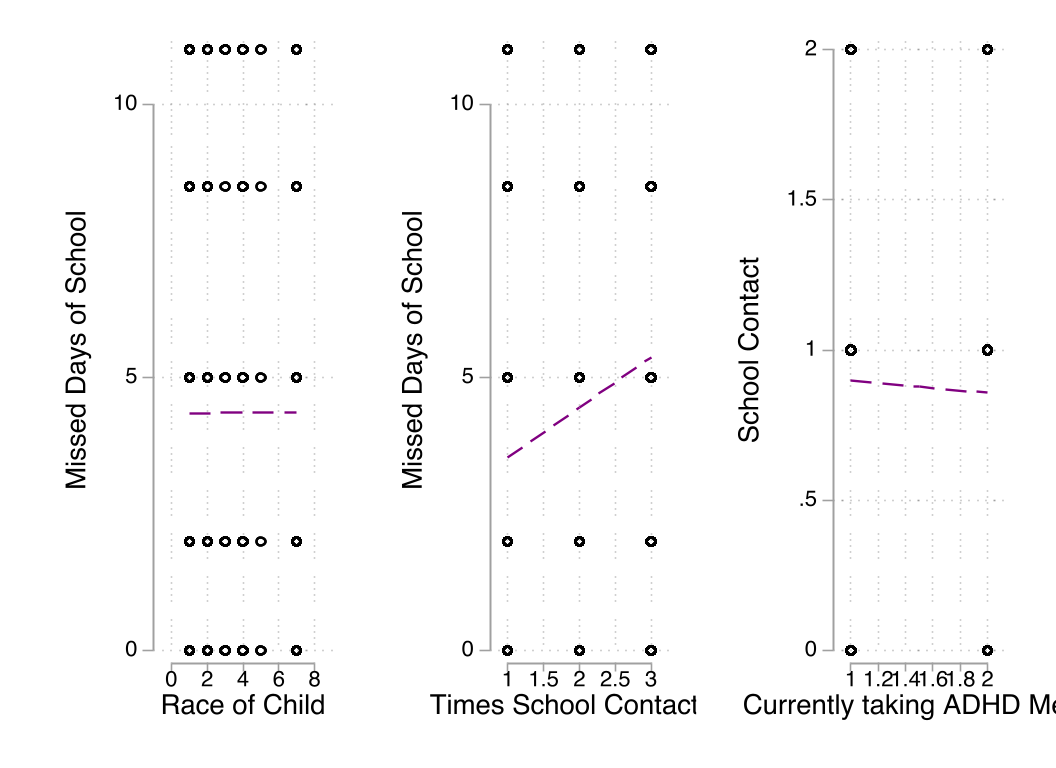

In [39]:
graph combine child_race school_contact adhd_meds, col(3) scheme(plotplainblind) xsize(4)

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. Write bullet points or a short paragraph summarizing what the matrix shows.
- negligible correlation between the child's race and the number of days missed from school. 
- moderate correlation between school contact and days missed from school
- weak correlation between adhd meds and missed days from school 

In [40]:
pwcorr days_missed child_race school_contact adhd_meds


             | days_m~d child_~e school~t adhd_m~s
-------------+------------------------------------
 days_missed |   1.0000 
  child_race |   0.0010   1.0000 
school_con~t |   0.2208   0.0646   1.0000 
   adhd_meds |   0.0665   0.0520  -0.0217   1.0000 


## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
Model 1: H1
Model 2: H2
    
    B. Which variables are included in each model
Model 1: Days missed from school and taking ADHD medication
Model 2: Days missed from school and taking ADHD medication with race and number of contacts from school 
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships
Model 1 tests the main hypothesis that I am interested in the affects of takinf ADHD medication on number of missed days of school. Model 2 includes race and the number of contacts from the school to family. Including race and the number of contacts as controls allows me to look at the relationship better. 

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

$\hat{Y} = \alpha + \beta \times x $

$\hat{Y} = \alpha + \beta_A \cdot x_A + \beta_R \cdot x_R + \beta_1 \cdot x_2 $

$\hat{Y} = \alpha + \beta_R \cdot x_R + \beta_A \cdot x_A + \beta_N \cdot x_N + \beta_3 \cdot x_3 $

$x_A$ is adhd_meds

$x_R$ is race 

$x_N$ is number of contacts 

K is the number of independent variables

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [40]:
est clear

*Model 1
quietly eststo: reg days_missed adhd_meds

*Model 2
quietly eststo: reg days_missed adhd_meds i.child_race i.school_contact

In [41]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (adhd_meds "Medication" 2.child_race "Black/AA" 3.child_race "A. Indian/Alaska Nat." 4.child_race "Asian" 5.child_race "Hawaiian/Pac. Islander" 7.child_race "2 or more races" 2.school_contact "1 time" 3.school_contact "2 or more times") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Medication          0.515***        0.536***
                  (0.112)         (0.110)   
Black/AA                           -1.014***
                                  (0.214)   
A. Indian/~.                       -0.178   
                                  (0.543)   
Asian                              -0.039   
                                  (0.375)   
Hawai.. Is~r                        0.637   
                                  (0.957)   
2 or more ~s                       -0.203   
                                  (0.191)   
1 time                              0.702***
                                  (0.158)   
2 or more ~s                        1.876***
                                  (0.118)   
--------------------------------------------
R-Squared

In [42]:
quietly esttab using researchassignment3.rtf, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (adhd_meds "Medication" 2.child_race "Black/AA" 3.child_race "A. Indian/Alaska Nat." 4.child_race "Asian" 5.child_race "Hawaiian/Pac. Islander" 7.child_race "2 or more races" 2.school_contact "1 time" 3.school_contact "2 or more times") noconstant rtf replace

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
Children with ADHD who are taking medication for it, miss school at a higher rate than those with ADHD who do not take medication. For children taking medication is not statistically significant for missed days of school (p > 0.05). This finding holds true for those taking medication even when race and school contact are included in the analysis. The relationship between children taking medication and missed school days is not spurious. 
There is some evidence for hypothesis 1 and hypothesis 2. 
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
In model 2 the hypothesis regarding the spurious relationship between medication, missed days, and number of contacts seems to show tome evidence of a relationship. This provides insight into there being a relationship between the number of times the school is contacted and missed days of school. There was no significant relationship between race, although there is some interesting figures around Black respondents (this data does not allow for diving in deeper to this). This suggests that there is no relationship between race and missed days of school. 

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
I think being able to further break down race to look at differences for each of the variables would give further insight into what I am working on for my MA thesis. The data includes information on if the child received behavioral treatment which may add an additional layer that could be interesting to explore. 

In [43]:
log close 

      name:  <unnamed>
       log:  /Users/aborjon/Desktop/stats2/soc211/Research Assignment 3.log
  log type:  text
 closed on:  26 Feb 2024, 22:33:06
-------------------------------------------------------------------------------
